In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features8.csv')
df

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,35,36,37,38,39,40,41,42,43,English Type
0,0.503926,2863.528511,3068.590795,5091.295974,0.075223,-330.49750,-5.631140e-02,-1.305158e-02,129.82634,5.654399e-04,...,-2.752345,-1.821501e-03,9.363368e-04,-4.558670,6.158995e-03,3.925575e-03,-0.389210,1.502641e-03,2.480886e-03,1
1,0.387303,2366.006257,2395.289588,4699.281629,0.065283,-322.01425,-3.602875e-03,-2.423903e-02,128.47772,-6.527488e-03,...,-1.544018,7.676435e-03,7.934333e-04,-1.401703,5.644315e-03,-5.167238e-04,-5.707905,-2.998314e-03,1.379392e-04,0
2,0.447855,4385.587175,3884.844459,8003.728725,0.136615,-340.64084,-1.116015e-02,-1.194324e-02,97.25810,-4.836332e-03,...,-10.403498,-6.431966e-03,6.693075e-04,0.850455,-6.629119e-04,-1.358620e-03,-11.889046,-1.693906e-03,1.692394e-04,0
3,0.486216,2358.214724,2081.928649,4239.875408,0.072844,-377.72028,2.176717e-08,-6.462130e-09,140.99352,3.265076e-08,...,-4.418817,0.000000e+00,-2.380785e-09,-4.824514,-3.401121e-10,1.020336e-09,-3.209569,0.000000e+00,1.211649e-09,0
4,0.470306,2690.409490,3108.192676,5306.686114,0.048585,-330.79733,-9.279275e-03,3.626792e-03,98.38888,2.809254e-03,...,-0.268788,-2.190437e-03,1.166201e-03,-1.180020,-6.167702e-04,-1.668033e-03,0.379468,-3.115617e-03,2.192514e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,0.426552,3645.447879,3456.966248,6460.066901,0.104180,-321.37543,2.145348e-08,-1.592251e-09,125.37948,8.045056e-09,...,-5.950925,2.681685e-09,-2.430277e-09,-10.296289,6.704213e-10,5.195765e-09,-6.076538,-1.340843e-09,4.190133e-11,0
2134,0.444152,3273.783853,3329.220097,6173.545193,0.093596,-334.67572,2.969725e-03,-7.079506e-03,115.60187,2.633094e-03,...,-22.601553,-3.429410e-03,-3.406802e-04,-8.010031,3.347575e-04,1.722395e-04,-8.633924,2.589215e-03,-7.905327e-05,0
2135,0.383148,3670.118530,3253.610481,6407.672935,0.100979,-237.90643,2.993488e-02,-6.727289e-03,103.26113,3.290961e-02,...,-3.508986,-5.677356e-04,-7.979744e-04,-8.856752,3.319585e-05,-1.515660e-04,-2.979901,-5.256697e-04,1.029256e-03,0
2136,0.408675,3054.049136,3250.488592,5473.606375,0.082966,-312.73398,5.774686e-02,2.157346e-04,130.01166,4.117964e-02,...,-1.335617,-9.031654e-05,2.355064e-03,-6.252686,-1.106754e-03,1.026079e-03,-0.870628,-1.179720e-03,-9.064542e-04,0


In [3]:
X = df.iloc[:,0:44]
y = df.iloc[:,44]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1496, 44) (1496,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='rmsprop', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=32,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
47/47 [==============================] - 1s 6ms/step - loss: 1.1053 - val_loss: 0.9559
Epoch 2/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.9496 - val_loss: 0.8562
Epoch 3/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.8765 - val_loss: 0.8047
Epoch 4/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.8319 - val_loss: 0.7684
Epoch 5/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.7993 - val_loss: 0.7422
Epoch 6/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.7741 - val_loss: 0.7218
Epoch 7/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.7544 - val_loss: 0.7055
Epoch 8/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.7382 - val_loss: 0.6921
Epoch 9/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.7250 - val_loss: 0.6810
Epoch 10/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.7141 - val_loss: 0.6715

47/47 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.5761
Epoch 83/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.5759
Epoch 84/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6158 - val_loss: 0.5757
Epoch 85/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6156 - val_loss: 0.5755
Epoch 86/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6155 - val_loss: 0.5754
Epoch 87/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6154 - val_loss: 0.5753
Epoch 88/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5752
Epoch 89/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5750
Epoch 90/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6150 - val_loss: 0.5749
Epoch 91/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6149 - val_loss: 0.5747
Epoc

47/47 [==============================] - 0s 3ms/step - loss: 0.6114 - val_loss: 0.5704
Epoch 163/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6114 - val_loss: 0.5703
Epoch 164/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6113 - val_loss: 0.5703
Epoch 165/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6113 - val_loss: 0.5702
Epoch 166/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6113 - val_loss: 0.5702
Epoch 167/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6113 - val_loss: 0.5703
Epoch 168/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6113 - val_loss: 0.5702
Epoch 169/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6113 - val_loss: 0.5702
Epoch 170/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6112 - val_loss: 0.5701
Epoch 171/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6112 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6104 - val_loss: 0.5689
Epoch 243/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6104 - val_loss: 0.5689
Epoch 244/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 245/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 246/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 247/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 248/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 249/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 250/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6103 - val_loss: 0.5689
Epoch 251/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6103 - val_loss: 0.

47/47 [==============================] - 0s 2ms/step - loss: 0.6100 - val_loss: 0.5683
Epoch 323/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 324/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 325/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 326/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 327/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 328/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 329/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 330/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.5683
Epoch 331/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.

47/47 [==============================] - 0s 2ms/step - loss: 0.6098 - val_loss: 0.5680
Epoch 403/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 404/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5680
Epoch 405/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 406/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 407/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 408/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 409/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 410/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5679
Epoch 411/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6097 - val_loss: 0.

47/47 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 483/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 484/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 485/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 486/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 487/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 488/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 489/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 490/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5677
Epoch 491/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.

47/47 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 563/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 564/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 565/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 566/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 567/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 568/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 569/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 570/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5676
Epoch 571/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 643/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 644/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 645/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 646/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 647/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 648/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 649/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 650/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 651/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6095 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 723/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 724/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5673
Epoch 725/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 726/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6095 - val_loss: 0.5673
Epoch 727/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 728/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 729/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 730/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5674
Epoch 731/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 803/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 804/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 805/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 806/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 807/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 808/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 809/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 810/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 811/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 883/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 884/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 885/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 886/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 887/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 888/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 889/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 890/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 891/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 963/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 964/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 965/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 966/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 967/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 968/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 969/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 970/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5673
Epoch 971/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1043/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1044/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1045/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1046/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1047/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1048/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1049/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1050/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1051/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1122/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1123/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1124/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1125/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1126/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1127/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1128/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1129/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1130/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1201/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1202/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1203/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1204/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1205/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1206/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1207/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1208/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1209/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1280/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1281/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1282/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1283/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5672
Epoch 1284/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1285/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1286/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1287/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1288/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1359/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1360/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1361/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1362/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1363/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1364/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1365/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1366/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1367/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1438/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1439/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1440/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1441/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1442/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1443/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1444/1500
47/47 [==============================] - 0s 2ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1445/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val_loss: 0.5671
Epoch 1446/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6093 - val

In [8]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8286604361370716
Precision:  0.6866781184188817
Recall:  0.8286604361370716
F1-score:  0.7510176354768691
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       532
           1       0.00      0.00      0.00       110

    accuracy                           0.83       642
   macro avg       0.41      0.50      0.45       642
weighted avg       0.69      0.83      0.75       642



In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 81.78%


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.97      0.90       532
           1       0.38      0.10      0.16       110

    accuracy                           0.82       642
   macro avg       0.61      0.53      0.53       642
weighted avg       0.76      0.82      0.77       642



# CNN

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [21]:
X = df.iloc[:,0:44]
y = df.iloc[:,44]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [23]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [24]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=32,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
47/47 [==============================] - 1s 10ms/step - loss: 35.2234 - accuracy: 0.6945 - val_loss: 20.8950 - val_accuracy: 0.8287
Epoch 2/1500
47/47 [==============================] - 0s 8ms/step - loss: 7.9655 - accuracy: 0.7132 - val_loss: 0.5341 - val_accuracy: 0.7664
Epoch 3/1500
47/47 [==============================] - 0s 7ms/step - loss: 2.0363 - accuracy: 0.7273 - val_loss: 0.6579 - val_accuracy: 0.8287
Epoch 4/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.9913 - accuracy: 0.7727 - val_loss: 0.5547 - val_accuracy: 0.7196
Epoch 5/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.5851 - accuracy: 0.7975 - val_loss: 0.4730 - val_accuracy: 0.8287
Epoch 6/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.5760 - accuracy: 0.8028 - val_loss: 0.4447 - val_accuracy: 0.8287
Epoch 7/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.6174 - accuracy: 0.8108 - val_loss: 0.4604 - val_accuracy: 0.8287
Epo

47/47 [==============================] - 0s 7ms/step - loss: 0.4426 - accuracy: 0.8222 - val_loss: 0.4622 - val_accuracy: 0.8255
Epoch 59/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.4545 - accuracy: 0.8222 - val_loss: 0.4438 - val_accuracy: 0.8287
Epoch 60/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.4534 - accuracy: 0.8282 - val_loss: 0.4785 - val_accuracy: 0.8178
Epoch 61/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.4448 - accuracy: 0.8249 - val_loss: 0.4621 - val_accuracy: 0.8271
Epoch 62/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.4388 - accuracy: 0.8235 - val_loss: 0.4554 - val_accuracy: 0.8287
Epoch 63/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.4412 - accuracy: 0.8249 - val_loss: 0.4527 - val_accuracy: 0.8318
Epoch 64/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.4397 - accuracy: 0.8249 - val_loss: 0.4512 - val_accuracy: 0.8287
Epoch 65/1500

47/47 [==============================] - 0s 8ms/step - loss: 0.4231 - accuracy: 0.8235 - val_loss: 0.4602 - val_accuracy: 0.8271
Epoch 116/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4232 - accuracy: 0.8295 - val_loss: 0.4598 - val_accuracy: 0.8287
Epoch 117/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4322 - accuracy: 0.8262 - val_loss: 0.4530 - val_accuracy: 0.8271
Epoch 118/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.8275 - val_loss: 0.4737 - val_accuracy: 0.8178
Epoch 119/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4163 - accuracy: 0.8289 - val_loss: 0.4688 - val_accuracy: 0.8240
Epoch 120/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4252 - accuracy: 0.8275 - val_loss: 0.4642 - val_accuracy: 0.8271
Epoch 121/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.4259 - accuracy: 0.8269 - val_loss: 0.4596 - val_accuracy: 0.8271
Epoch 1

Epoch 172/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4046 - accuracy: 0.8329 - val_loss: 0.4726 - val_accuracy: 0.8240
Epoch 173/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4135 - accuracy: 0.8362 - val_loss: 0.4583 - val_accuracy: 0.8240
Epoch 174/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4070 - accuracy: 0.8282 - val_loss: 0.4950 - val_accuracy: 0.8006
Epoch 175/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8309 - val_loss: 0.4663 - val_accuracy: 0.8224
Epoch 176/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3993 - accuracy: 0.8336 - val_loss: 0.4907 - val_accuracy: 0.8255
Epoch 177/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4199 - accuracy: 0.8316 - val_loss: 0.4550 - val_accuracy: 0.8287
Epoch 178/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4101 - accuracy: 0.8369 - val_loss: 0.4755 - val_accuracy:

Epoch 229/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.8382 - val_loss: 0.4710 - val_accuracy: 0.8178
Epoch 230/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3974 - accuracy: 0.8322 - val_loss: 0.4705 - val_accuracy: 0.8255
Epoch 231/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3969 - accuracy: 0.8342 - val_loss: 0.4773 - val_accuracy: 0.8178
Epoch 232/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3989 - accuracy: 0.8369 - val_loss: 0.4732 - val_accuracy: 0.8162
Epoch 233/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4058 - accuracy: 0.8389 - val_loss: 0.4842 - val_accuracy: 0.8240
Epoch 234/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3967 - accuracy: 0.8436 - val_loss: 0.4605 - val_accuracy: 0.8287
Epoch 235/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4016 - accuracy: 0.8369 - val_loss: 0.4787 - val_accuracy:

Epoch 286/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3963 - accuracy: 0.8422 - val_loss: 0.4788 - val_accuracy: 0.8240
Epoch 287/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3699 - accuracy: 0.8496 - val_loss: 0.4818 - val_accuracy: 0.8209
Epoch 288/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3919 - accuracy: 0.8389 - val_loss: 0.5088 - val_accuracy: 0.8146
Epoch 289/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3803 - accuracy: 0.8463 - val_loss: 0.4916 - val_accuracy: 0.8193
Epoch 290/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.8422 - val_loss: 0.5146 - val_accuracy: 0.7944
Epoch 291/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3799 - accuracy: 0.8349 - val_loss: 0.4844 - val_accuracy: 0.8084
Epoch 292/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3944 - accuracy: 0.8409 - val_loss: 0.4841 - val_accuracy:

Epoch 343/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3438 - accuracy: 0.8636 - val_loss: 0.5445 - val_accuracy: 0.7944
Epoch 344/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3437 - accuracy: 0.8583 - val_loss: 0.5439 - val_accuracy: 0.8037
Epoch 345/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3987 - accuracy: 0.8476 - val_loss: 0.4927 - val_accuracy: 0.8240
Epoch 346/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3452 - accuracy: 0.8576 - val_loss: 0.5473 - val_accuracy: 0.8146
Epoch 347/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3572 - accuracy: 0.8583 - val_loss: 0.5201 - val_accuracy: 0.8131
Epoch 348/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3806 - accuracy: 0.8536 - val_loss: 0.5423 - val_accuracy: 0.7991
Epoch 349/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3429 - accuracy: 0.8623 - val_loss: 0.5311 - val_accuracy:

Epoch 400/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3307 - accuracy: 0.8690 - val_loss: 0.5767 - val_accuracy: 0.8053
Epoch 401/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3376 - accuracy: 0.8536 - val_loss: 0.5761 - val_accuracy: 0.8131
Epoch 402/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3432 - accuracy: 0.8590 - val_loss: 0.5673 - val_accuracy: 0.7928
Epoch 403/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3343 - accuracy: 0.8610 - val_loss: 0.5439 - val_accuracy: 0.8162
Epoch 404/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3509 - accuracy: 0.8643 - val_loss: 0.5459 - val_accuracy: 0.8193
Epoch 405/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3339 - accuracy: 0.8610 - val_loss: 0.5357 - val_accuracy: 0.8178
Epoch 406/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3366 - accuracy: 0.8630 - val_loss: 0.5347 - val_accuracy:

Epoch 457/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2988 - accuracy: 0.8737 - val_loss: 0.6634 - val_accuracy: 0.7866
Epoch 458/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2980 - accuracy: 0.8777 - val_loss: 0.6201 - val_accuracy: 0.7757
Epoch 459/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.8650 - val_loss: 0.6137 - val_accuracy: 0.8069
Epoch 460/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.8730 - val_loss: 0.6325 - val_accuracy: 0.7539
Epoch 461/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3048 - accuracy: 0.8710 - val_loss: 0.6780 - val_accuracy: 0.7819
Epoch 462/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3076 - accuracy: 0.8810 - val_loss: 0.6049 - val_accuracy: 0.7928
Epoch 463/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3404 - accuracy: 0.8683 - val_loss: 0.5980 - val_accuracy:

Epoch 514/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2730 - accuracy: 0.8877 - val_loss: 0.6404 - val_accuracy: 0.8006
Epoch 515/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2718 - accuracy: 0.8904 - val_loss: 0.6532 - val_accuracy: 0.7788
Epoch 516/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2674 - accuracy: 0.8930 - val_loss: 0.6914 - val_accuracy: 0.7788
Epoch 517/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.2568 - accuracy: 0.8930 - val_loss: 0.6848 - val_accuracy: 0.7975
Epoch 518/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2854 - accuracy: 0.8864 - val_loss: 0.6966 - val_accuracy: 0.8037
Epoch 519/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2830 - accuracy: 0.8917 - val_loss: 0.6843 - val_accuracy: 0.7960
Epoch 520/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2790 - accuracy: 0.8870 - val_loss: 0.7072 - val_accuracy:

Epoch 571/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2474 - accuracy: 0.9011 - val_loss: 0.7224 - val_accuracy: 0.7804
Epoch 572/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.9011 - val_loss: 0.8321 - val_accuracy: 0.8006
Epoch 573/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2672 - accuracy: 0.8951 - val_loss: 0.7711 - val_accuracy: 0.7960
Epoch 574/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2554 - accuracy: 0.9031 - val_loss: 0.8588 - val_accuracy: 0.8037
Epoch 575/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2550 - accuracy: 0.9024 - val_loss: 0.6969 - val_accuracy: 0.7944
Epoch 576/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2444 - accuracy: 0.9004 - val_loss: 0.6808 - val_accuracy: 0.7882
Epoch 577/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2532 - accuracy: 0.8964 - val_loss: 0.7826 - val_accuracy:

Epoch 628/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2448 - accuracy: 0.8937 - val_loss: 0.9845 - val_accuracy: 0.8084
Epoch 629/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2395 - accuracy: 0.9031 - val_loss: 0.8126 - val_accuracy: 0.7928
Epoch 630/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2379 - accuracy: 0.9037 - val_loss: 0.8120 - val_accuracy: 0.7788
Epoch 631/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.9138 - val_loss: 0.7353 - val_accuracy: 0.7960
Epoch 632/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2235 - accuracy: 0.9245 - val_loss: 0.8267 - val_accuracy: 0.8084
Epoch 633/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.9124 - val_loss: 0.8475 - val_accuracy: 0.8006
Epoch 634/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2303 - accuracy: 0.9071 - val_loss: 0.8175 - val_accuracy:

Epoch 685/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1853 - accuracy: 0.9258 - val_loss: 0.9061 - val_accuracy: 0.7944
Epoch 686/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2087 - accuracy: 0.9158 - val_loss: 0.8502 - val_accuracy: 0.7913
Epoch 687/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2078 - accuracy: 0.9205 - val_loss: 0.9042 - val_accuracy: 0.8084
Epoch 688/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1898 - accuracy: 0.9265 - val_loss: 0.8193 - val_accuracy: 0.7913
Epoch 689/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1957 - accuracy: 0.9091 - val_loss: 0.9623 - val_accuracy: 0.7975
Epoch 690/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2321 - accuracy: 0.9218 - val_loss: 0.9325 - val_accuracy: 0.7913
Epoch 691/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2023 - accuracy: 0.9151 - val_loss: 0.8974 - val_accuracy:

Epoch 742/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2037 - accuracy: 0.9245 - val_loss: 0.8374 - val_accuracy: 0.7960
Epoch 743/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1846 - accuracy: 0.9291 - val_loss: 0.9066 - val_accuracy: 0.7897
Epoch 744/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1770 - accuracy: 0.9238 - val_loss: 1.0908 - val_accuracy: 0.7617
Epoch 745/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1960 - accuracy: 0.9285 - val_loss: 0.9330 - val_accuracy: 0.7882
Epoch 746/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2075 - accuracy: 0.9205 - val_loss: 0.9438 - val_accuracy: 0.7897
Epoch 747/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1888 - accuracy: 0.9311 - val_loss: 0.8735 - val_accuracy: 0.7928
Epoch 748/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2016 - accuracy: 0.9171 - val_loss: 0.9719 - val_accuracy:

Epoch 799/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9412 - val_loss: 1.1290 - val_accuracy: 0.7539
Epoch 800/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9378 - val_loss: 2.4368 - val_accuracy: 0.5935
Epoch 801/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.9325 - val_loss: 0.9869 - val_accuracy: 0.8022
Epoch 802/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1455 - accuracy: 0.9365 - val_loss: 1.2388 - val_accuracy: 0.7975
Epoch 803/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1802 - accuracy: 0.9311 - val_loss: 1.0237 - val_accuracy: 0.8006
Epoch 804/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1528 - accuracy: 0.9425 - val_loss: 1.0298 - val_accuracy: 0.8053
Epoch 805/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1885 - accuracy: 0.9345 - val_loss: 1.0023 - val_accuracy:

Epoch 856/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1509 - accuracy: 0.9385 - val_loss: 1.1730 - val_accuracy: 0.8115
Epoch 857/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1431 - accuracy: 0.9525 - val_loss: 1.0386 - val_accuracy: 0.7928
Epoch 858/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1494 - accuracy: 0.9445 - val_loss: 1.2302 - val_accuracy: 0.8006
Epoch 859/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1353 - accuracy: 0.9432 - val_loss: 1.0505 - val_accuracy: 0.7819
Epoch 860/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1746 - accuracy: 0.9365 - val_loss: 1.1099 - val_accuracy: 0.8037
Epoch 861/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1310 - accuracy: 0.9525 - val_loss: 1.1417 - val_accuracy: 0.7960
Epoch 862/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1499 - accuracy: 0.9439 - val_loss: 1.1678 - val_accuracy:

Epoch 913/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9499 - val_loss: 1.1777 - val_accuracy: 0.7882
Epoch 914/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1348 - accuracy: 0.9525 - val_loss: 1.3438 - val_accuracy: 0.7960
Epoch 915/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1223 - accuracy: 0.9499 - val_loss: 1.1953 - val_accuracy: 0.7866
Epoch 916/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1122 - accuracy: 0.9505 - val_loss: 1.1609 - val_accuracy: 0.7648
Epoch 917/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1274 - accuracy: 0.9465 - val_loss: 1.2456 - val_accuracy: 0.8006
Epoch 918/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1206 - accuracy: 0.9572 - val_loss: 1.2958 - val_accuracy: 0.8037
Epoch 919/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1452 - accuracy: 0.9525 - val_loss: 1.2800 - val_accuracy:

Epoch 970/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1216 - accuracy: 0.9566 - val_loss: 1.2970 - val_accuracy: 0.7913
Epoch 971/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1256 - accuracy: 0.9612 - val_loss: 1.4587 - val_accuracy: 0.8053
Epoch 972/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1307 - accuracy: 0.9519 - val_loss: 1.2684 - val_accuracy: 0.7570
Epoch 973/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1339 - accuracy: 0.9652 - val_loss: 1.2663 - val_accuracy: 0.7866
Epoch 974/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1115 - accuracy: 0.9652 - val_loss: 1.2293 - val_accuracy: 0.7773
Epoch 975/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1251 - accuracy: 0.9599 - val_loss: 1.2421 - val_accuracy: 0.7866
Epoch 976/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1231 - accuracy: 0.9586 - val_loss: 1.2668 - val_accuracy:

Epoch 1027/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1094 - accuracy: 0.9686 - val_loss: 1.4734 - val_accuracy: 0.7866
Epoch 1028/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1378 - accuracy: 0.9626 - val_loss: 1.4339 - val_accuracy: 0.7601
Epoch 1029/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1363 - accuracy: 0.9672 - val_loss: 1.6199 - val_accuracy: 0.7819
Epoch 1030/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1055 - accuracy: 0.9606 - val_loss: 1.4844 - val_accuracy: 0.7601
Epoch 1031/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0783 - accuracy: 0.9753 - val_loss: 1.5325 - val_accuracy: 0.7773
Epoch 1032/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1081 - accuracy: 0.9632 - val_loss: 1.3648 - val_accuracy: 0.7726
Epoch 1033/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0998 - accuracy: 0.9626 - val_loss: 1.3350 - val_ac

47/47 [==============================] - 0s 7ms/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 1.4641 - val_accuracy: 0.7632
Epoch 1084/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0867 - accuracy: 0.9706 - val_loss: 1.5325 - val_accuracy: 0.7741
Epoch 1085/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0947 - accuracy: 0.9693 - val_loss: 1.5243 - val_accuracy: 0.7741
Epoch 1086/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0887 - accuracy: 0.9686 - val_loss: 1.4617 - val_accuracy: 0.7679
Epoch 1087/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1474 - accuracy: 0.9693 - val_loss: 1.4272 - val_accuracy: 0.7523
Epoch 1088/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0919 - accuracy: 0.9679 - val_loss: 1.4122 - val_accuracy: 0.7648
Epoch 1089/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0689 - accuracy: 0.9733 - val_loss: 1.6474 - val_accuracy: 0.7928
E

47/47 [==============================] - 0s 7ms/step - loss: 0.0897 - accuracy: 0.9706 - val_loss: 1.6032 - val_accuracy: 0.7741
Epoch 1140/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0657 - accuracy: 0.9766 - val_loss: 1.6573 - val_accuracy: 0.7819
Epoch 1141/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0923 - accuracy: 0.9699 - val_loss: 1.7195 - val_accuracy: 0.7928
Epoch 1142/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0894 - accuracy: 0.9766 - val_loss: 1.6047 - val_accuracy: 0.7897
Epoch 1143/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0812 - accuracy: 0.9753 - val_loss: 1.7210 - val_accuracy: 0.8037
Epoch 1144/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0886 - accuracy: 0.9706 - val_loss: 1.5538 - val_accuracy: 0.7773
Epoch 1145/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0830 - accuracy: 0.9733 - val_loss: 1.5693 - val_accuracy: 0.7773
E

47/47 [==============================] - 0s 7ms/step - loss: 0.0848 - accuracy: 0.9686 - val_loss: 1.6766 - val_accuracy: 0.7679
Epoch 1196/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1342 - accuracy: 0.9592 - val_loss: 1.5982 - val_accuracy: 0.7866
Epoch 1197/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9793 - val_loss: 1.7992 - val_accuracy: 0.7897
Epoch 1198/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1059 - accuracy: 0.9672 - val_loss: 1.7167 - val_accuracy: 0.7835
Epoch 1199/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0770 - accuracy: 0.9739 - val_loss: 1.6479 - val_accuracy: 0.7960
Epoch 1200/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0533 - accuracy: 0.9813 - val_loss: 1.7648 - val_accuracy: 0.7632
Epoch 1201/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0737 - accuracy: 0.9813 - val_loss: 1.7294 - val_accuracy: 0.7975
E

47/47 [==============================] - 0s 7ms/step - loss: 0.0579 - accuracy: 0.9799 - val_loss: 1.7509 - val_accuracy: 0.7757
Epoch 1252/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0819 - accuracy: 0.9759 - val_loss: 1.7717 - val_accuracy: 0.7928
Epoch 1253/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0684 - accuracy: 0.9779 - val_loss: 1.9267 - val_accuracy: 0.7913
Epoch 1254/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 1.7301 - val_accuracy: 0.7788
Epoch 1255/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1023 - accuracy: 0.9759 - val_loss: 1.8197 - val_accuracy: 0.7710
Epoch 1256/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 1.9531 - val_accuracy: 0.7913
Epoch 1257/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 0.9759 - val_loss: 1.8048 - val_accuracy: 0.7835
E

47/47 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 1.9051 - val_accuracy: 0.7897
Epoch 1308/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0966 - accuracy: 0.9726 - val_loss: 1.8624 - val_accuracy: 0.7850
Epoch 1309/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.9799 - val_loss: 2.0821 - val_accuracy: 0.8100
Epoch 1310/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.9746 - val_loss: 1.8769 - val_accuracy: 0.7835
Epoch 1311/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0974 - accuracy: 0.9733 - val_loss: 1.6742 - val_accuracy: 0.7757
Epoch 1312/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0646 - accuracy: 0.9820 - val_loss: 1.7592 - val_accuracy: 0.7726
Epoch 1313/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0964 - accuracy: 0.9753 - val_loss: 1.7849 - val_accuracy: 0.7773
E

47/47 [==============================] - 0s 7ms/step - loss: 0.0589 - accuracy: 0.9779 - val_loss: 2.1584 - val_accuracy: 0.7819
Epoch 1364/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0615 - accuracy: 0.9840 - val_loss: 1.8979 - val_accuracy: 0.7601
Epoch 1365/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1247 - accuracy: 0.9813 - val_loss: 2.0579 - val_accuracy: 0.7664
Epoch 1366/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 0.9873 - val_loss: 1.9062 - val_accuracy: 0.7523
Epoch 1367/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0563 - accuracy: 0.9813 - val_loss: 2.2264 - val_accuracy: 0.7897
Epoch 1368/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0579 - accuracy: 0.9793 - val_loss: 1.9340 - val_accuracy: 0.7664
Epoch 1369/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0750 - accuracy: 0.9793 - val_loss: 2.0719 - val_accuracy: 0.7773
E

47/47 [==============================] - 0s 7ms/step - loss: 0.1562 - accuracy: 0.9739 - val_loss: 2.0766 - val_accuracy: 0.7726
Epoch 1420/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 2.2142 - val_accuracy: 0.7617
Epoch 1421/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0701 - accuracy: 0.9846 - val_loss: 2.2005 - val_accuracy: 0.7710
Epoch 1422/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0551 - accuracy: 0.9840 - val_loss: 2.1428 - val_accuracy: 0.7586
Epoch 1423/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9833 - val_loss: 2.0516 - val_accuracy: 0.7664
Epoch 1424/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 2.1326 - val_accuracy: 0.7601
Epoch 1425/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0752 - accuracy: 0.9766 - val_loss: 2.2834 - val_accuracy: 0.7757
E

47/47 [==============================] - 0s 7ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 2.0352 - val_accuracy: 0.7710
Epoch 1476/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0456 - accuracy: 0.9886 - val_loss: 2.0764 - val_accuracy: 0.7819
Epoch 1477/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0956 - accuracy: 0.9813 - val_loss: 1.8917 - val_accuracy: 0.7710
Epoch 1478/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0774 - accuracy: 0.9786 - val_loss: 2.0366 - val_accuracy: 0.7975
Epoch 1479/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0610 - accuracy: 0.9806 - val_loss: 2.0095 - val_accuracy: 0.7882
Epoch 1480/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1019 - accuracy: 0.9753 - val_loss: 1.9673 - val_accuracy: 0.7850
Epoch 1481/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9826 - val_loss: 1.9783 - val_accuracy: 0.7695
E

In [25]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.7990654205607477


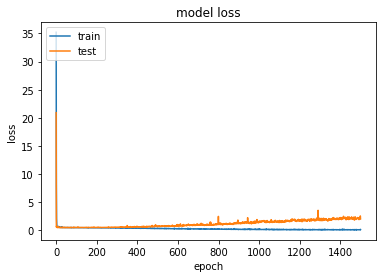

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

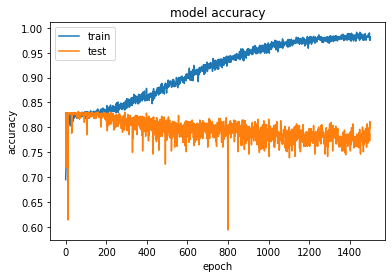

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
from pycm import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, classification_report


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.85      0.92      0.88       532
           1       0.36      0.22      0.27       110

    accuracy                           0.80       642
   macro avg       0.60      0.57      0.58       642
weighted avg       0.77      0.80      0.78       642

Predict   0         1         
Actual
0         489       43        

1         86        24        





Overall Statistics : 

95% CI                                                            (0.76807,0.83006)
ACC Macro                                                         0.79907
ARI                                                               0.11918
AUNP                                                              0.56868
AUNU                                                              0.56868
Bangdiwala B                                                      0.76515
Bennett S                                                         0.59813
CBA   